In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация признаков

In [3]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [4]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:,1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

# Задание №1

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    
    print(f'Final MSE: {calc_mse(y, np.dot(X_st, W))}')
    return W

In [8]:
gradient_descent_reg_l2(X_st, y, 5000, eta=1e-1, reg=1e-8)

Iter: 0, weights: [11.38683255  1.40289741  2.98595729  1.29652057], error 3374.098073787416
Iter: 500, weights: [56.49999972  6.30305868 -0.35622097  6.57133787], error 24.90461888207731
Iter: 1000, weights: [56.49999972  6.30309342 -0.35638864  6.57147626], error 24.90461887690849
Iter: 1500, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.904618876908476
Iter: 2000, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.90461887690848
Iter: 2500, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.90461887690848
Iter: 3000, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.90461887690848
Iter: 3500, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.90461887690848
Iter: 4000, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.90461887690848
Iter: 4500, weights: [56.49999972  6.30309342 -0.35638865  6.57147627], error 24.90461887690848
Final MSE: 24.90461887690848


array([56.49999972,  6.30309342, -0.35638865,  6.57147627])

Iter: 0, weights: [ 1.99620641  0.43595231  0.59788383 -2.08920065], alpha: 0.001, error 3296.024362506609
Iter: 500, weights: [56.41758652  5.86683875  1.60381394  4.97520979], alpha: 0.003163006031036151, error 25.58613425280874
Iter: 1000, weights: [56.24703126  6.11786635  0.40737141  5.94432245], alpha: 0.01000460715237106, error 25.072382272297546
Iter: 1500, weights: [55.706829    6.11876212  0.14304877  6.16541359], alpha: 0.03164463276109707, error 25.581785452943816
Iter: 2000, weights: [54.05866816  5.88150677  0.49867479  5.87708484], alpha: 0.10009216427327416, error 31.029460024703194
Iter: 2500, weights: [49.38833552  5.2341659   1.51842879  4.99716892], alpha: 0.31659211925582736, error 76.44238556927648
Iter: 3000, weights: [38.58097044  4.11815962  2.51638227  3.80053789], alpha: 1.0013827825846984, error 350.39575459945235
Iter: 3500, weights: [22.45604074  2.77887807  2.30795268  2.65581932], alpha: 3.1673797806911637, error 1203.187208861012
Iter: 4000, weights: [9

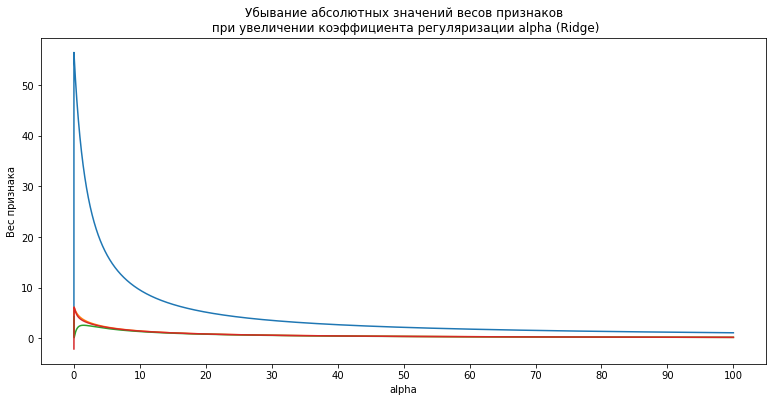

In [9]:
np.random.seed(20)
plt.figure(figsize=(13, 6))

train_amount = 10
train_X = X_st[:train_amount]
train_y = y[:train_amount]
test_X = X_st[train_amount:]
test_y = y[train_amount:]
iterations = 5000
n = train_X.shape[0]

W = np.random.randn(train_X.shape[1])
eta = 1e-2
alpha_list = np.logspace(-3, 2, iterations)
coeffs = np.zeros((iterations, train_X.shape[1]))


for i, val in enumerate(alpha_list):
    y_pred = np.dot(train_X, W)
    error = calc_mse(train_y, y_pred)
    
    dQ = 2/n * train_X.T @ (y_pred - train_y) # градиент функции ошибки
    dReg = val * W # градиент регуляризации
    
    W -=  eta * (dQ + dReg)

    coeffs[i, :] = W
        
    if i % (iterations / 10) == 0:
        print(f'Iter: {i}, weights: {W.flatten()}, alpha: {val}, error {error}')

        
for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.show()

Вывод: с увеличением lambda уменьшаются значения весов. На графике есть резкий скачок в весах, не понимаю как от него избавиться. Скорее всего причина в том, что при инициализации весов берутся очень маленькие значения, но потом функция выравнивается и плавно снижается.

# Задание №2

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [10]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W / np.abs(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    
    print(f'Final MSE: {calc_mse(y, np.dot(X_st, W))}')
    return W

In [11]:
gradient_descent_reg_l1(X_st, y, 5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.43214393  2.59888853  2.92629662  1.13252745], error 3466.2937524847794
Iter: 500, weights: [56.49995     6.30285723 -0.35562936  6.57090689], error 24.9046189799844
Iter: 1000, weights: [56.49995     6.30289122 -0.35579345  6.57104233], error 24.9046189409973
Iter: 1500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996162
Iter: 2000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 2500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 3000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 3500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 4000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Iter: 4500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.904618940996166
Final MSE: 24.904618940996166


array([56.49995   ,  6.30289122, -0.35579346,  6.57104233])

# Задание №3

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [12]:
def normal_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [13]:
X_norm = X.copy().astype(np.float64)
X_norm = normal_scale(X_norm[:,1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [14]:
X_norm_st = standard_scale(X_norm)
X_norm_st

array([[-7.07106781e-01, -9.79589689e-01, -8.96258160e-01],
       [-7.07106781e-01, -5.67130873e-01, -8.96258160e-01],
       [-3.53553391e-01, -4.64016169e-01,  3.84110640e-01],
       [ 7.07106781e-01, -7.73360281e-01, -8.96258160e-01],
       [-1.96261557e-16,  9.79589689e-01,  3.84110640e-01],
       [-1.06066017e+00, -3.60901465e-01, -8.96258160e-01],
       [ 7.07106781e-01,  1.08270439e+00,  1.66447944e+00],
       [ 2.47487373e+00,  2.11385144e+00,  1.66447944e+00],
       [-7.07106781e-01, -1.08270439e+00, -8.96258160e-01],
       [-3.53553391e-01,  5.15573521e-02,  3.84110640e-01]])

In [15]:
print(X_norm_st.min(axis=0))
print(X_norm_st.max(axis=0))

[-1.06066017 -1.08270439 -0.89625816]
[2.47487373 2.11385144 1.66447944]


In [16]:
print(X_norm_st.mean(axis=0))
print(X_norm_st.std(axis=0))

[-1.49880108e-16 -6.86950496e-17  8.32667268e-17]
[1. 1. 1.]


# Задание №4*

Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [17]:
from sklearn import datasets

In [18]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=1, n_targets=1, noise=5, coef=True, random_state=42)
X[:, 0] *= 10

In [19]:
display(X, Y, coef)

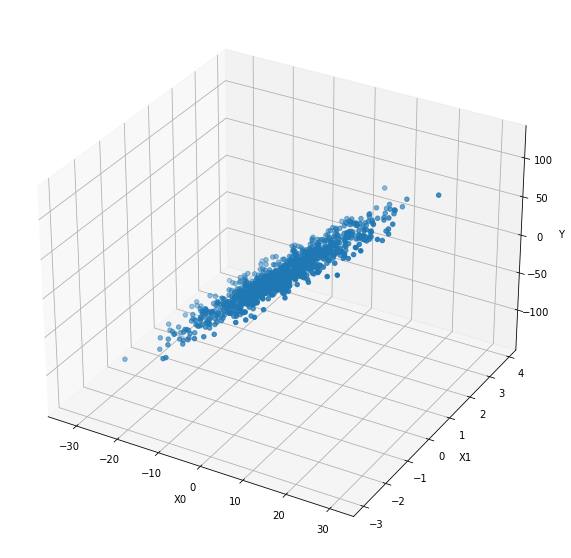

In [20]:
# Визуализируем данные
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Стандартизируем данные

In [21]:
X = standard_scale(X)
X

array([[-1.54118814, -1.44358372],
       [-1.31880703, -0.64019452],
       [-0.51941629, -1.62815563],
       ...,
       [ 0.31122764, -0.79399414],
       [-1.27016552,  0.24923667],
       [-0.63435888, -2.61030121]])

In [22]:
print(X.mean(axis=0))
print(X.std(axis=0))

[-2.66453526e-17  4.13002965e-17]
[1. 1.]


In [41]:
W = np.zeros(X.shape[1])

**Классический градиентный спуск**

In [33]:
def classic_gradient_descent(X, Y, W, iterations, eta):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        error = calc_mse(Y, y_pred)
        errors.append(error)
        
        dQ = 2/n * X.T @ (y_pred - Y)
        W -= eta * dQ
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter - {i}, error - {error}')
    
    print(f'Final MSE - {errors[-1]}')
    return W, np.array(w_list), errors

In [34]:
%%time
weights_GD, w_list_GD, errors_GD = classic_gradient_descent(X, Y, W, 5000, 1e-3)

Iter - 0, error - 1544.7503578851652
Iter - 500, error - 230.2037637967159
Iter - 1000, error - 52.66273067884905
Iter - 1500, error - 28.683615823216897
Iter - 2000, error - 25.444852592612698
Iter - 2500, error - 25.007394052608163
Iter - 3000, error - 24.948305106489094
Iter - 3500, error - 24.940323556580513
Iter - 4000, error - 24.939245404896987
Iter - 4500, error - 24.939099763734525
Final MSE - 24.939080101727885
CPU times: user 1.51 s, sys: 324 ms, total: 1.83 s
Wall time: 260 ms


**Стохастический градиентный спуск**

In [38]:
W = np.zeros(X.shape[1])

In [39]:
def stohastic_gradient_descent(X, Y, W, iterations, eta, size):
    w_list = [W.copy()]
    errors = []
    min_weight_dist = 1e-8
    weight_dist = np.inf
    iter_num = 0
    
    while weight_dist > min_weight_dist and iter_num < iterations:
    
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        new_w = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        weight_dist = np.linalg.norm(new_w - W, ord=2)

        error = mserror(X, new_w, Y)

        w_list.append(new_w.copy())
        errors.append(error)

        if iter_num % (iterations // 10) == 0:
            print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

        iter_num += 1
        W = new_w

    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')
    return W, np.array(w_list), errors

In [40]:
%%time
weights_SGD, w_list_SGD, errors_SGD = stohastic_gradient_descent(X, Y, W, iterations=5000, eta=1e-3, size=1)

Iteration #0: W_new = [0.25645199 0.0803972 ], MSE = 1524.79
Iteration #500: W_new = [25.2447787   0.91800072], MSE = 214.25
Iteration #1000: W_new = [34.46202305  0.38560947], MSE = 45.44
Iteration #1500: W_new = [37.16261892  0.32304316], MSE = 28.29
Iteration #2000: W_new = [38.45464216  0.25899619], MSE = 25.23
Iteration #2500: W_new = [38.64459689  0.04041096], MSE = 25.07
Iteration #3000: W_new = [38.95444406 -0.19296161], MSE = 25.05
Iteration #3500: W_new = [39.04732162 -0.04200633], MSE = 24.98
Iteration #4000: W_new = [39.06828422 -0.07931695], MSE = 25.0
Iteration #4500: W_new = [39.21904633  0.12288494], MSE = 24.99
В случае использования стохастического градиентного спуска ошибка составляет 24.9401
CPU times: user 537 ms, sys: 4.8 ms, total: 542 ms
Wall time: 539 ms


## **Визуализация изменения функицонала ошибки**

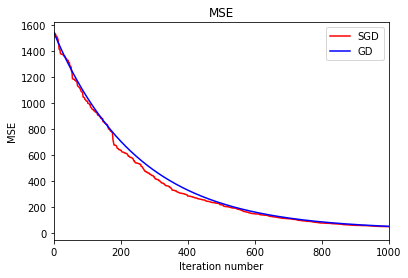

In [30]:
plt.plot(range(len(errors_SGD)), errors_SGD, color='red', label='SGD')
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

plt.show()

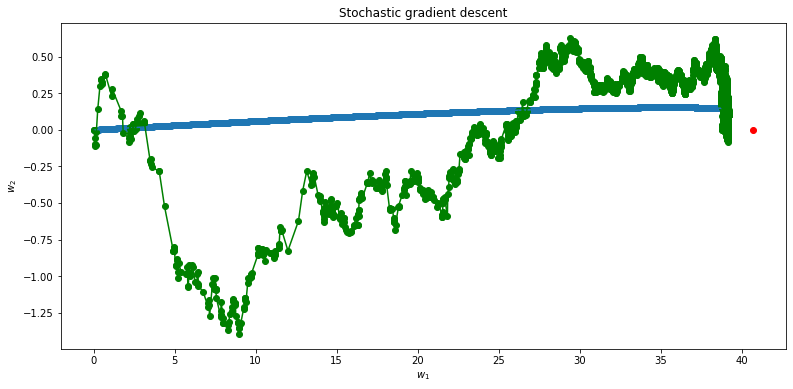

In [31]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1])
plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='green')
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1])
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='green')

plt.show()

Вывод: стохастический градиентный спуск работает в разы быстрее классического. Он не такой плавный, но зато позволяет не хранить весь объем данных в памяти. 